# Imports and notebook settings

In [1]:
from collections import Counter
import platform
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import IPython
from IPython.display import display #, Math, Latex

from notebook.services.config import ConfigManager

# Print versions
print('Python version: {}'.format(platform.python_version()))
print('IPython version: {}'.format(IPython.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))

Python version: 3.6.5
IPython version: 5.4.1
matplotlib version: 2.2.2
numpy version: 1.13.3
pandas version: 0.23.0


In [2]:
%matplotlib inline  

pd.set_option('display.max_colwidth', 2000)
matplotlib.pyplot.style.use('default')
matplotlib.style.use('ggplot')

# Longest label to use in non-tabular graphs, like journal names in bar charts
max_label_length = 30

# Disable autoclosing of brackets (may require re-running and restarting)
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

plt.rcParams['font.family'] = 'serif'

In [3]:
%%javascript
// Disable the scrollbar in output cells
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Stats about exported papers

## The scopus search query, duplicated here for reference (for year 2012)

Other than PUBYEAR being changed to reflect it, the other years (2013, 2014, 2015, 2016) are identical

The search queries are also listed in the exports/ directory.

## Load data

In [4]:
def find_csv_files(data_dir):
    """Find all files matching the format 'filename_year.csv' in the given
       directory, and return them as a mapping {year:relpath}
    """
    years = {}
    # underscore, followed by any number (i.e year), followed by .csv
    patt = '_([0-9]+)\.csv$'
    
    for filename in os.listdir(data_dir):
        result = re.search(patt, filename)
        if not result:
            continue
        else:
            year = int(result.group(1))
            years[year] = os.path.join(data_dir, filename)
    return years

def read_data_for_year(path):
    """Given a path to a csv and optionally an integer use_first_N_papers, 
       read the entire csv into a pandas dataframe.
       
       Returns the dataframe.
    """
    df = pd.read_csv(path,
                     sep=',', 
                     quotechar='"', 
                     doublequote=True, 
                     header=0, 
                     encoding='utf-8')

    df.index += 1
    return df

# The directory that contains the exported .csv-files
# Each exported .csv-file for a year should be named on the format scopus_year.csv,
# e.g scopus_2012.csv
data_dir = "exports/"

figure_output_dir = "figs/"

# How many papers from each year to use for the shortlist (i.e the very most cited of the most cited)
# The included full export spans 2000 papers for each year, which very well might be enough to include
# papers with very few or no recorded citations. Creating a shortlist of the top (e.g) 60 of these 2k
# may therefore be educational.
num_papers_shortlist = 60

# only used for some keyword tables
num_papers_veryshortlist = 15

csv_files = find_csv_files(data_dir)
dataframes_longlist = {}
dataframes_shortlist = {}
dataframes_veryshortlist = {}
for year in csv_files:
    __df = read_data_for_year(csv_files[year])
    dataframes_longlist[year] = __df
    dataframes_shortlist[year] = __df.head(n=num_papers_shortlist)
    dataframes_veryshortlist[year] = __df.head(n=num_papers_veryshortlist)


## Show summaries

In [5]:
# Show the columns of one of the csv (should be the same for all)
some_year = list(dataframes_shortlist)[0]
print(dataframes_longlist[some_year].columns)

Index(['Authors', 'Title', 'Year', 'Source title', 'Cited by', 'DOI', 'Link',
       'Abstract', 'Author Keywords', 'Index Keywords', 'Document Type',
       'Source', 'EID'],
      dtype='object')


In [6]:
def show_overview(year, df, N=15):
    """Given an integer year, print out a table of the first few (N) papers from that year.
       Limit it to a few of the columns, specified below.
    """

    # Columns to use in table, based on the informally printed columns in the previous cell.
    #elems = df[['Cited by', 'Title', 'Authors', 'Source title', 'DOI']]
    # Skip DOI to conserve space
    elems = df[['Cited by', 'Title', 'Authors', 'Source title']]

    print('\n ↓ ↓ ↓ {} ↓ ↓ ↓\n'.format(year))
    display(elems.head(n=N))
    print('\n ↑ ↑ ↑ {} ↑ ↑ ↑\n'.format(year))

    # export the table to latex and save it as a texfile
    filename = 'paper_table_{}.tex'.format(year)
    path = os.path.join(figure_output_dir, filename)

    # tex does not like long columns
    with pd.option_context("max_colwidth", 30):
        tex = elems.head(n=N).to_latex()

    with open(path, 'w') as f:
        f.write(tex)

print("Full list:")
for year in sorted(dataframes_longlist):
    print("    Year: {},  number of papers: {}".format(year, len(dataframes_longlist[year])))
print('\nShort list:')
for year in sorted(dataframes_shortlist):
    print("    Year: {},  number of papers: {}".format(year, len(dataframes_shortlist[year])))
        
for year in sorted(dataframes_longlist):
    show_overview(year, dataframes_longlist[year])

Full list:
    Year: 2012,  number of papers: 2000
    Year: 2013,  number of papers: 2000
    Year: 2014,  number of papers: 2000
    Year: 2015,  number of papers: 2000
    Year: 2016,  number of papers: 2000

Short list:
    Year: 2012,  number of papers: 60
    Year: 2013,  number of papers: 60
    Year: 2014,  number of papers: 60
    Year: 2015,  number of papers: 60
    Year: 2016,  number of papers: 60

 ↓ ↓ ↓ 2012 ↓ ↓ ↓



,Cited by,Title,Authors,Source title
1,592,Context-aware saliency detection,"Goferman S., Zelnik-Manor L., Tal A.",IEEE Transactions on Pattern Analysis and Machine Intelligence
2,456,A modified Artificial Bee Colony algorithm for real-parameter optimization,"Akay B., Karaboga D.",Information Sciences
3,424,Measuring the objectness of image windows,"Alexe B., Deselaers T., Ferrari V.",IEEE Transactions on Pattern Analysis and Machine Intelligence
4,415,Blind image quality assessment: A natural scene statistics approach in the DCT domain,"Saad M.A., Bovik A.C., Charrier C.",IEEE Transactions on Image Processing
5,292,RASL: Robust alignment by sparse and low-rank decomposition for linearly correlated images,"Peng Y., Ganesh A., Wright J., Xu W., Ma Y.",IEEE Transactions on Pattern Analysis and Machine Intelligence
6,287,Cooperatively coevolving particle swarms for large scale optimization,"Li X., Yao X.",IEEE Transactions on Evolutionary Computation
7,249,A practical guide to training restricted boltzmann machines,Hinton G.E.,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)
8,186,Learning sparse representations for human action recognition,"Guha T., Ward R.K.",IEEE Transactions on Pattern Analysis and Machine Intelligence
9,179,Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition,"Stallkamp J., Schlipsing M., Salmen J., Igel C.",Neural Networks
10,175,Single image super-resolution with non-local means and steering kernel regression,"Zhang K., Gao X., Tao D., Li X.",IEEE Transactions on Image Processing



 ↑ ↑ ↑ 2012 ↑ ↑ ↑


 ↓ ↓ ↓ 2013 ↓ ↓ ↓



,Cited by,Title,Authors,Source title
1,665,Robust recovery of subspace structures by low-rank representation,"Liu G., Lin Z., Yan S., Sun J., Yu Y., Ma Y.",IEEE Transactions on Pattern Analysis and Machine Intelligence
2,490,"Sparse subspace clustering: Algorithm, theory, and applications","Elhamifar E., Vidal R.",IEEE Transactions on Pattern Analysis and Machine Intelligence
3,434,Private traits and attributes are predictable from digital records of human behavior,"Kosinski M., Stillwell D., Graepel T.",Proceedings of the National Academy of Sciences of the United States of America
4,431,Strategies for finding good local guides in multi-objective particle swarm optimization (MOPSO),"Mostaghim S., Teich J.","2003 IEEE Swarm Intelligence Symposium, SIS 2003 - Proceedings"
5,391,Particle swarm optimization with Gaussian mutation,"Higashi N., Iba H.","2003 IEEE Swarm Intelligence Symposium, SIS 2003 - Proceedings"
6,371,Bare bones particle swarms,Kennedy J.,"2003 IEEE Swarm Intelligence Symposium, SIS 2003 - Proceedings"
7,315,Fitness-distance-ratio based particle swarm optimization,"Peram T., Veeramachaneni K., Mohan C.K.","2003 IEEE Swarm Intelligence Symposium, SIS 2003 - Proceedings"
8,286,New avenues in opinion mining and sentiment analysis,"Cambria E., Schuller B., Xia Y., Havasi C.",IEEE Intelligent Systems
9,257,Engineering optimization with particle swarm,"Hu X., Eberhart R.C., Shi Y.","2003 IEEE Swarm Intelligence Symposium, SIS 2003 - Proceedings"
10,241,Candidate multilinear maps from ideal lattices,"Garg S., Gentry C., Halevi S.",Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)



 ↑ ↑ ↑ 2013 ↑ ↑ ↑


 ↓ ↓ ↓ 2014 ↓ ↓ ↓



,Cited by,Title,Authors,Source title
1,767,Visualizing and understanding convolutional networks,"Zeiler M.D., Fergus R.",Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)
2,545,Clustering by fast search and find of density peaks,"Rodriguez A., Laio A.",Science
3,266,Distributed representations of sentences and documents,"Le Q., Mikolov T.","31st International Conference on Machine Learning, ICML 2014"
4,257,DeCAF: A deep convolutional activation feature for generic visual recognition,"Donahue J., Jia Y., Vinyals O., Hoffman J., Zhang N., Tzeng E., Darrell T.","31st International Conference on Machine Learning, ICML 2014"
5,238,"An Insight into Extreme Learning Machines: Random Neurons, Random Features and Kernels",Huang G.-B.,Cognitive Computation
6,191,Stretchable silicon nanoribbon electronics for skin prosthesis,"Kim J., Lee M., Shim H.J., Ghaffari R., Cho H.R., Son D., Jung Y.H., Soh M., Choi C., Jung S., Chu K., Jeon D., Lee S.-T., Kim J.H., Choi S.H., Hyeon T., Kim D.-H.",Nature Communications
7,178,DeepReID: Deep filter pairing neural network for person re-identification,"Li W., Zhao R., Xiao T., Wang X.",Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition
8,177,Robust text detection in natural scene images,"Yin X.-C., Yin X., Huang K., Hao H.-W.",IEEE Transactions on Pattern Analysis and Machine Intelligence
9,171,Deep learning-based classification of hyperspectral data,"Chen Y., Lin Z., Zhao X., Wang G., Gu Y.",IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing
10,167,Unobtrusive sensing and wearable devices for health informatics,"Zheng Y.-L., Ding X.-R., Poon C.C.Y., Lo B.P.L., Zhang H., Zhou X.-L., Yang G.-Z., Zhao N., Zhang Y.-T.",IEEE Transactions on Biomedical Engineering



 ↑ ↑ ↑ 2014 ↑ ↑ ↑


 ↓ ↓ ↓ 2015 ↓ ↓ ↓



,Cited by,Title,Authors,Source title
1,577,Human-level control through deep reinforcement learning,"Mnih V., Kavukcuoglu K., Silver D., Rusu A.A., Veness J., Bellemare M.G., Graves A., Riedmiller M., Fidjeland A.K., Ostrovski G., Petersen S., Beattie C., Sadik A., Antonoglou I., King H., Kumaran D., Wierstra D., Legg S., Hassabis D.",Nature
2,385,Batch normalization: Accelerating deep network training by reducing internal covariate shift,"Ioffe S., Szegedy C.","32nd International Conference on Machine Learning, ICML 2015"
3,376,MatConvNet: Convolutional neural networks for MATLAB,"Vedaldi A., Lenc K.",MM 2015 - Proceedings of the 2015 ACM Multimedia Conference
4,299,Show and tell: A neural image caption generator,"Vinyals O., Toshev A., Bengio S., Erhan D.",Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition
5,195,Spark SQL: Relational data processing in spark,"Armbrust M., Xin R.S., Lian C., Huai Y., Liu D., Bradley J.K., Meng X., Kaftan T., Frankliny M.J., Ghodsi A., Zaharia M.",Proceedings of the ACM SIGMOD International Conference on Management of Data
6,192,"Show, attend and tell: Neural image caption generation with visual attention","Xu K., Ba J.L., Kiros R., Cho K., Courville A., Salakhutdinov R., Zemel R.S., Bengio Y.","32nd International Conference on Machine Learning, ICML 2015"
7,188,The human splicing code reveals new insights into the genetic determinants of disease,"Xiong H.Y., Alipanahi B., Lee L.J., Bretschneider H., Merico D., Yuen R.K.C., Hua Y., Gueroussov S., Najafabadi H.S., Hughes T.R., Morris Q., Barash Y., Krainer A.R., Jojic N., Scherer S.W., Blencowe B.J., Frey B.J.",Science
8,150,The movielens datasets: History and context,"Harper F.M., Konstan J.A.",ACM Transactions on Interactive Intelligent Systems
9,111,iPPI-Esml: AN ensemble classifier for identifying the interactions of proteins by incorporating their physicochemical properties and wavelet transforms into PseAAC,"Jia J., Liu Z., Xiao X., Liu B., Chou K.-C.",Journal of Theoretical Biology
10,109,DaDianNao: A Machine-Learning Supercomputer,"Chen Y., Luo T., Liu S., Zhang S., He L., Wang J., Li L., Chen T., Xu Z., Sun N., Temam O.","Proceedings of the Annual International Symposium on Microarchitecture, MICRO"



 ↑ ↑ ↑ 2015 ↑ ↑ ↑


 ↓ ↓ ↓ 2016 ↓ ↓ ↓



,Cited by,Title,Authors,Source title
1,571,Mastering the game of Go with deep neural networks and tree search,"Silver D., Huang A., Maddison C.J., Guez A., Sifre L., Van Den Driessche G., Schrittwieser J., Antonoglou I., Panneershelvam V., Lanctot M., Dieleman S., Grewe D., Nham J., Kalchbrenner N., Sutskever I., Lillicrap T., Leach M., Kavukcuoglu K., Graepel T., Hassabis D.",Nature
2,152,"Deep Convolutional Neural Networks for Computer-Aided Detection: CNN Architectures, Dataset Characteristics and Transfer Learning","Shin H.-C., Roth H.R., Gao M., Lu L., Xu Z., Nogues I., Yao J., Mollura D., Summers R.M.",IEEE Transactions on Medical Imaging
3,98,MLlib: Machine learning in Apache Spark,"Meng X., Bradley J., Yavuz B., Sparks E., Venkataraman S., Liu D., Freeman J., Tsai D.B., Amde M., Owen S., Xin D., Xin R., Franklin M.J., Zadeh R., Zaharia M., Talwalkar A.",Journal of Machine Learning Research
4,97,XGBoost: A scalable tree boosting system,"Chen T., Guestrin C.",Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining
5,89,Social big data: Recent achievements and new challenges,"Bello-Orgaz G., Jung J.J., Camacho D.",Information Fusion
6,77,Deep neural networks: A promising tool for fault characteristic mining and intelligent diagnosis of rotating machinery with massive data,"Jia F., Lei Y., Lin J., Zhou X., Lu N.",Mechanical Systems and Signal Processing
7,71,ISuc-PseOpt: Identifying lysine succinylation sites in proteins by incorporating sequence-coupling effects into pseudo components and optimizing imbalanced training dataset,"Jia J., Liu Z., Xiao X., Liu B., Chou K.-C.",Analytical Biochemistry
8,69,Classification with Noisy Labels by Importance Reweighting,"Liu T., Tao D.",IEEE Transactions on Pattern Analysis and Machine Intelligence
9,52,Deep convolutional and LSTM recurrent neural networks for multimodal wearable activity recognition,"Ordóñez F.J., Roggen D.",Sensors (Switzerland)
10,50,Deep learning for remote sensing data: A technical tutorial on the state of the art,"Zhang L., Zhang L., Du B.",IEEE Geoscience and Remote Sensing Magazine



 ↑ ↑ ↑ 2016 ↑ ↑ ↑



## Document types

This section generates figures 

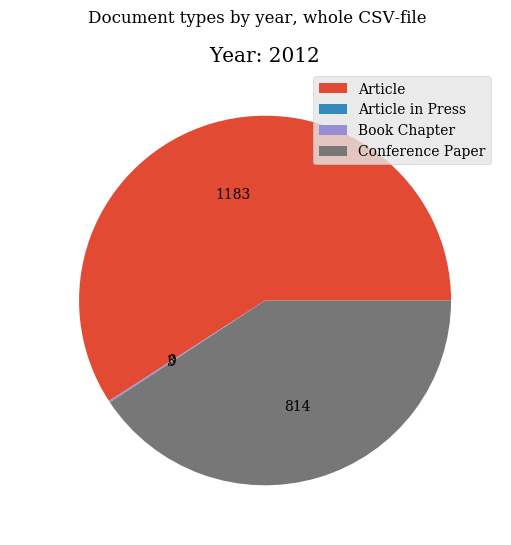

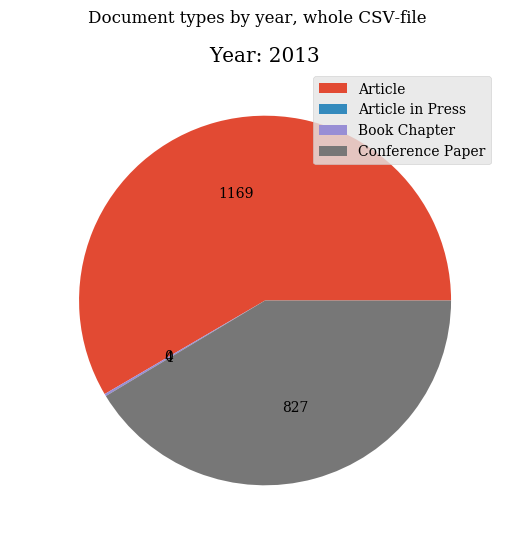

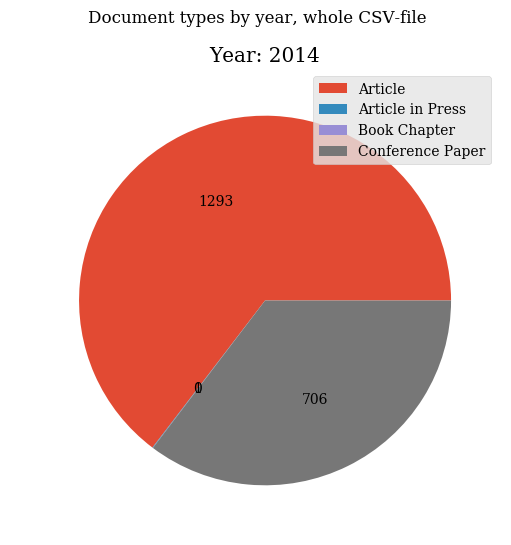

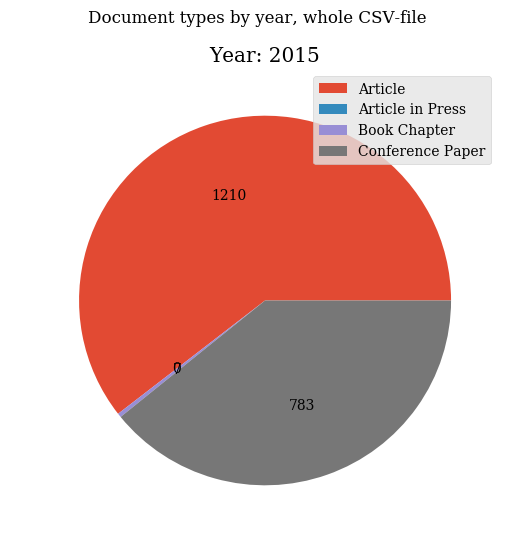

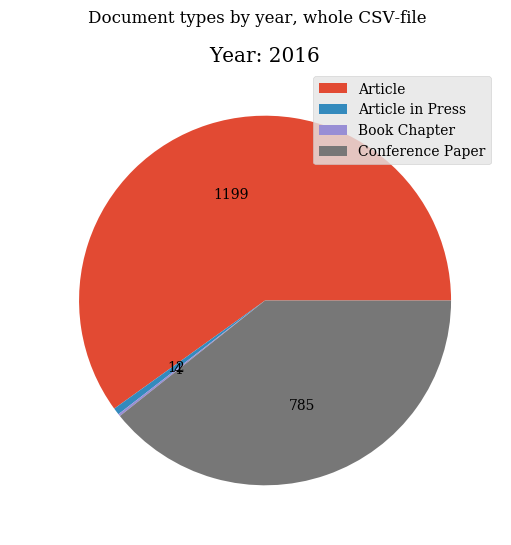

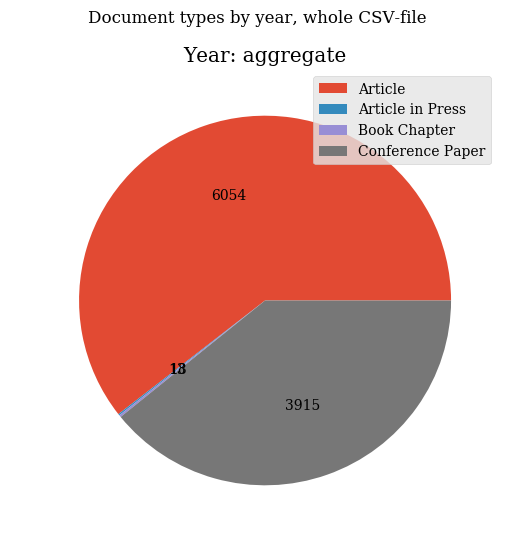

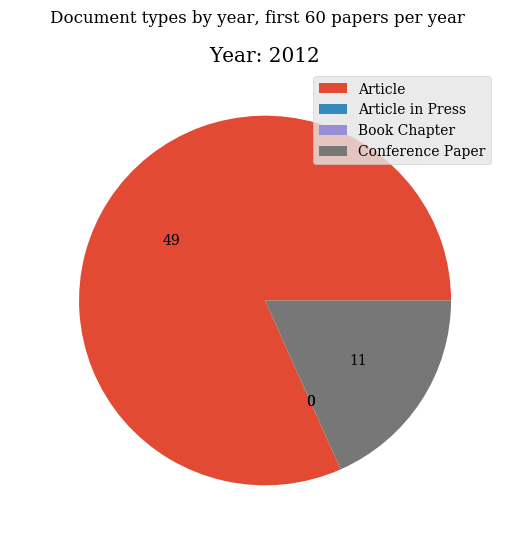

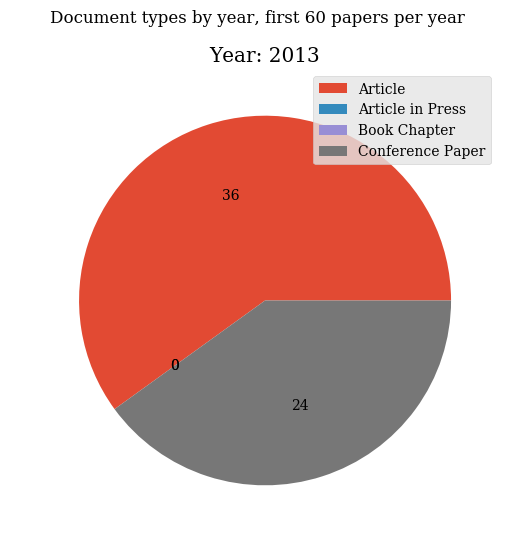

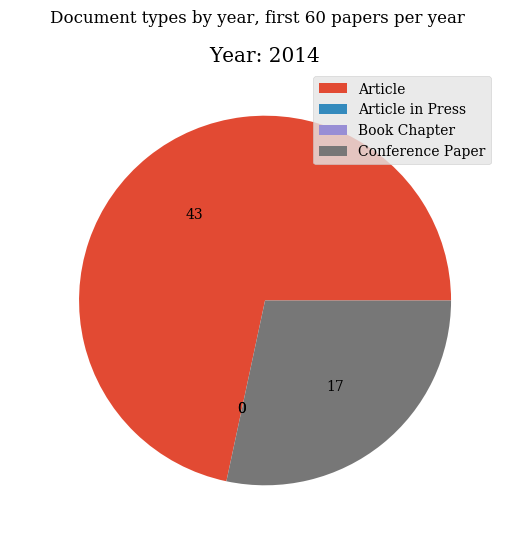

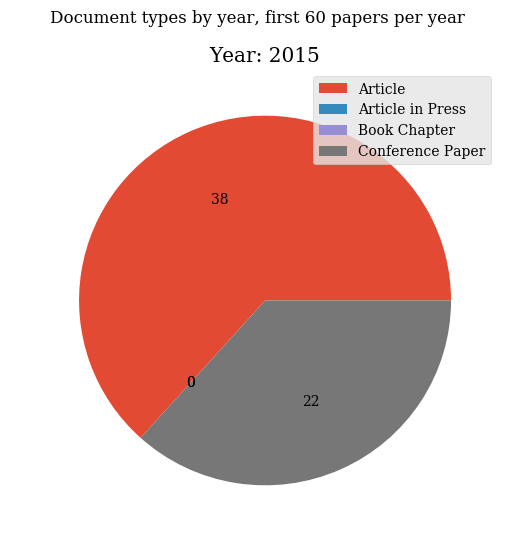

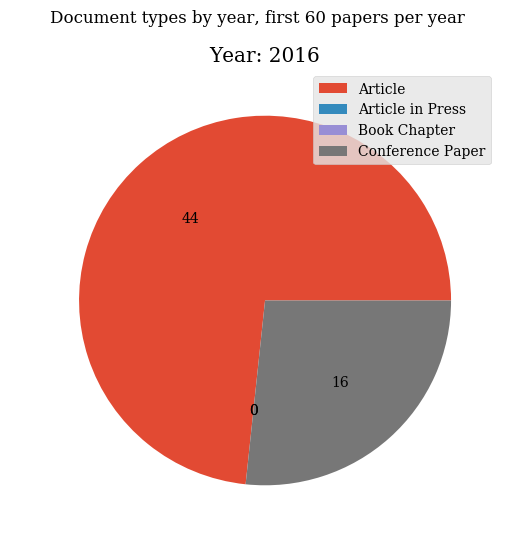

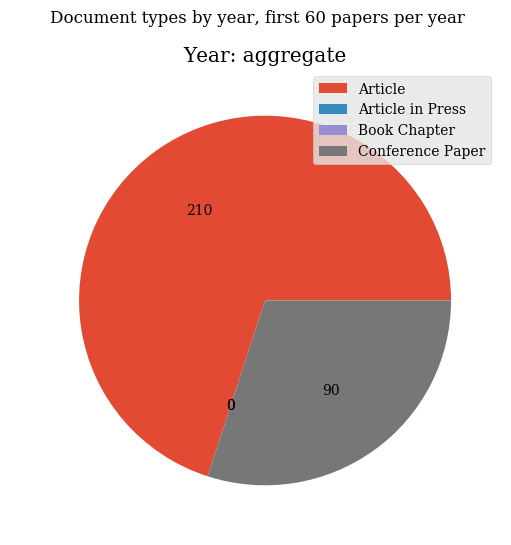

<Figure size 600x600 with 0 Axes>

In [7]:
def __get_used_document_types(dataframes_longlist):
    """helper function to get the names of the document types, so that the
       pie chart can have them added to the index even if they do not occur
       for that shortened set (or that year), such that the colours will be
       consistent.
    """
    #determine document types
    document_types_used = set()
    for year in sorted(dataframes_longlist):
        document_types_used.update( set(dataframes_longlist[year]['Document Type']) )

    return list(sorted(document_types_used))
        
def __plot_document_types(df_dict, all_document_types_used, plot_title="", filename_tag="none"):
    """Number of publications by document type
    
       pass in the result of __get_used_document_types to make colours consistent even
       if some document type does not occur for some df
    """
    def plot_bar(year,  plot_title, filename_tag, x2):
        fig = plt.figure(1, figsize=(6,6))
        fig.suptitle(plot_title)
        ax1 = fig.add_subplot(111, title='nonee')
        total = x2.sum()
        plt0 = x2.plot(
                       ax=ax1,
                       title="Year: {}".format(year),
                       legend=True,
                       kind='pie',
                       labels=None,
                       autopct= lambda p: '{}'.format(int(round(p*total/100.0))))
        plt0.axis('off')
        
        filename = "pie_document_type_{}_{}.svg".format(year, filename_tag)
        path = os.path.join(figure_output_dir, filename)
        fig.savefig(path)#, bbox_inches="tight")
        display(fig)
        plt.clf()        

    # Plot a piechart for each year -- some labels may overlap.
    for i_ax,year in enumerate(sorted(df_dict)):
        df = df_dict[year]
        x2 = df.copy().groupby(['Document Type']).size()
        
        #add zeros for document types that exist for the other years, but were not
        #present for this year.
        for document_type in all_document_types_used:
            if not document_type in x2:
                x2[document_type] = 0

        # sort on the index so that the same order of colours is assigned across years even if
        # some document type appears for the first time earlier than other years
        x2.sort_index(inplace=True)
 
        #make the piechart
        plot_bar(year, plot_title, filename_tag, x2)
        
        #accumulate an aggregate table for all the years
        if i_ax == 0: 
            # use the first year as a template
            aggregate = x2.copy() 
        else:
            # add (sum) on index (i.e document type)
            aggregate = aggregate.add(x2, axis='index')
    
    #make an aggregate piechart too
    plot_bar("aggregate", plot_title, filename_tag, aggregate)

used_document_types = __get_used_document_types(dataframes_longlist)
__plot_document_types(dataframes_longlist, 
                 used_document_types, 
                 plot_title="Document types by year, whole CSV-file",
                 filename_tag="long")

__plot_document_types(dataframes_shortlist, 
                 used_document_types, 
                 plot_title="Document types by year, first {} papers per year".format(num_papers_shortlist),
                 filename_tag="short")



## Display the distribution of papers across journals, for each year

(↓ ↓ ↓ begin full ↓ ↓ ↓)


,2012,2013,2014,2015,2016
count,541.000000,538.000000,621.000000,660.000000,666.000000
mean,3.696858,3.717472,3.220612,3.030303,3.003003
std,17.493823,15.122778,13.056501,8.775690,9.109525
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000
max,379.000000,278.000000,288.000000,125.000000,161.000000


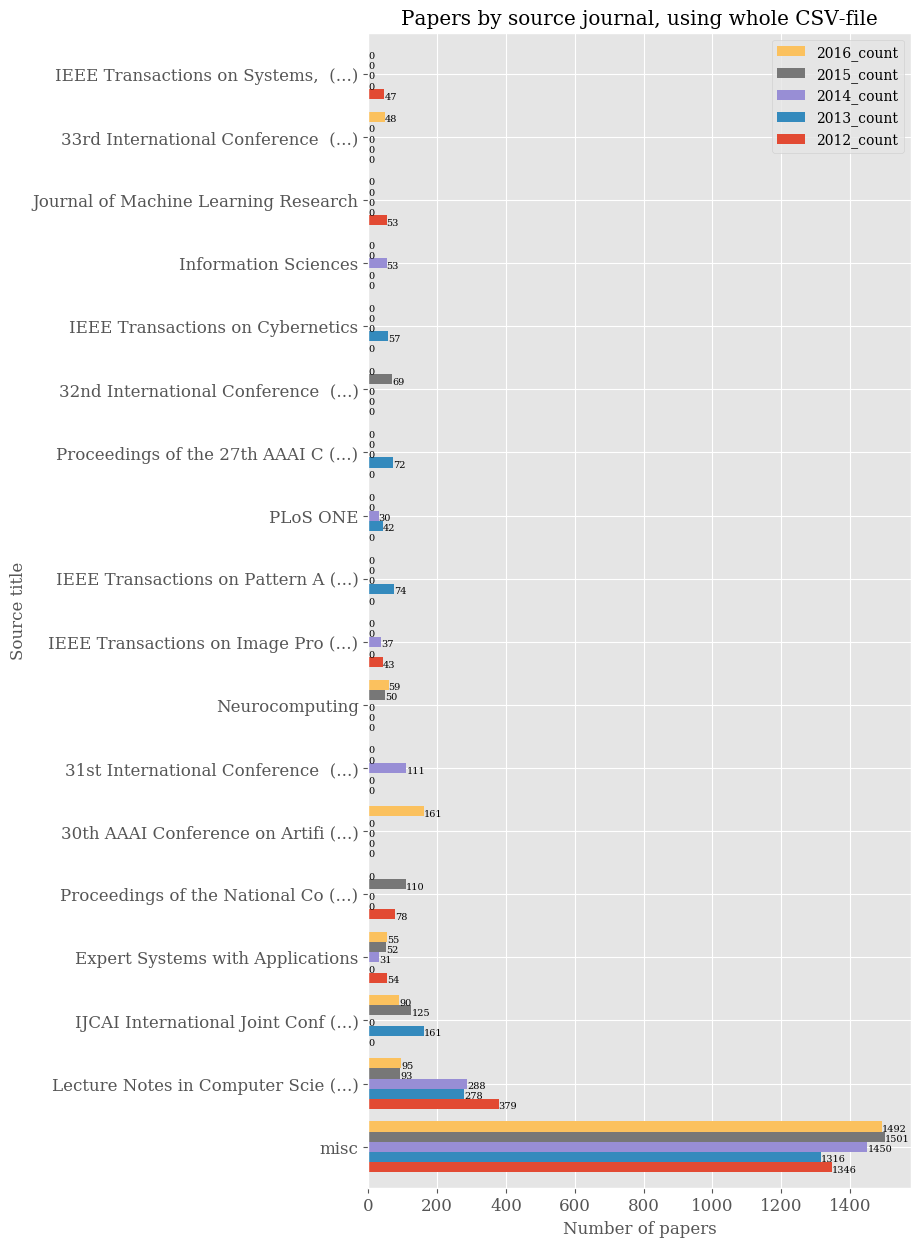

(↑ ↑ ↑ end full ↑ ↑ ↑)
(↓ ↓ ↓ begin short↓ ↓ ↓ )


,2012,2013,2014,2015,2016
count,28.000000,30.000000,38.000000,41.000000,42.000000
mean,2.142857,2.000000,1.578947,1.463415,1.428571
std,2.223016,2.392517,1.348304,1.246947,1.107466
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.750000,1.000000,1.000000
max,9.000000,10.000000,7.000000,8.000000,6.000000


<Figure size 640x480 with 0 Axes>

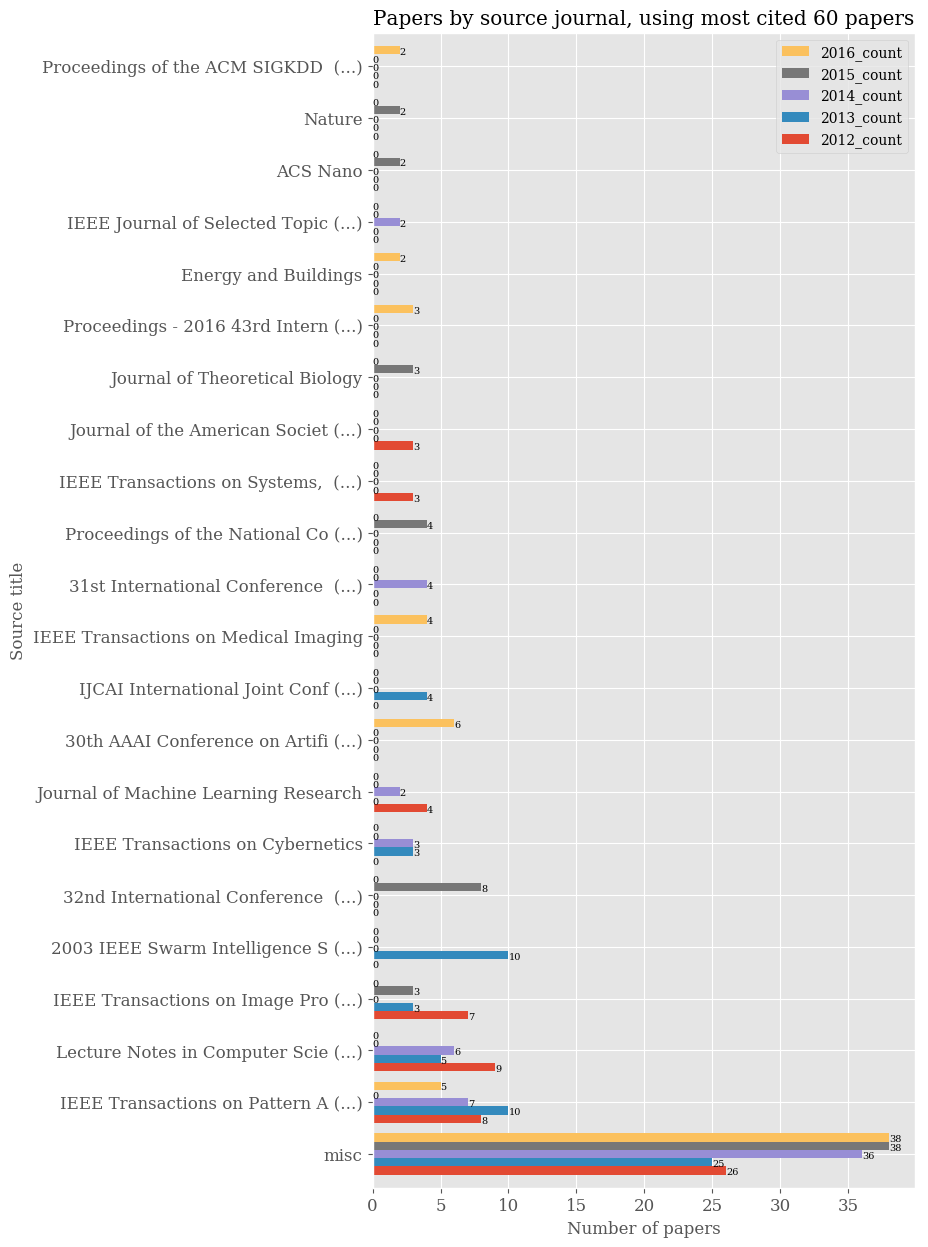

(↑ ↑ ↑ end short ↑ ↑ ↑)


<Figure size 640x480 with 0 Axes>

In [8]:
def generate_table_for_source_journals(df, year, filename_tag="none"):
    """Number of publications by source, sorted from high to low
       cut off after some number and aggregate the remainder into 'misc'
       
       returns a dataframe [source_title, count], where count is the number of
       paper published under that source_title (journal) in the input dataframe
       (i.e for a particular year)
    """

    # top X journals to list before aggregating into misc
    # note that this is 6 per year, so if all the years were to have unique
    # journals among the journals with the most papers, the table would have
    # X*num_years elements, plus a potential misc category. 
    # This is therefore a value very much down to tweaking according to input data.
    cutoff_index = 6

    df_grouped = df.copy().groupby(['Source title'])
    stats = df_grouped.size().describe()
    stats_frame = stats.to_frame()
    stats_frame.columns = [year]
    #display(stats_frame)
    
    assert stats['count'] == len(set(df['Source title']))
    
    grouped = pd.DataFrame( {'count': df_grouped.size()} ).reset_index().sort_values('count', ascending=False)

    # with the journals sorted by occurence, group the ones after a specified index together
    # under a 'misc' label, to not swamp the table with many journals with just a few publications
    if cutoff_index < len(df):
        _misc = [('misc', grouped[cutoff_index:]['count'].sum())]
        misc = pd.DataFrame(_misc, columns=['Source title', 'count'])
        final = pd.concat([grouped[:cutoff_index], misc])
    else:
        final = grouped
    return final, stats_frame

def __journal_distribution(df_dict, plot_title="", filename_tag="none"):
    merged_df = pd.DataFrame(columns=['Source title'])
    stats_frames_list = []
    
    for year in df_dict:
        df, stats_frame = generate_table_for_source_journals(df_dict[year], year, filename_tag)
        df.rename(columns={'count': '{}_count'.format(year)}, inplace=True)
        
        merged_df = merged_df.merge(df, how='outer', on='Source title')
        stats_frames_list.append(stats_frame)
        
    stats_frames = pd.concat(stats_frames_list, axis=1)
    display(stats_frames)
    
    tex = stats_frames.to_latex()
    filename = "journal_stats_{}.tex".format(filename_tag)
    path = os.path.join(figure_output_dir, filename)
    with open(path, 'w') as f:
        f.write(tex)
    
    
    bar_width = 0.80
    fontsize_labels = 12
    fontsize_bar_labels = 7
    
    merged_df['sum'] = merged_df[['{}_count'.format(year) for year in df_dict]].sum(axis=1)
    merged_df.sort_values(inplace=True, ascending=False, by=['sum'])
    # delete the sum and just keep the counts for each separate year
    # (the sum is a fairly long bar, but it can be plotted by commenting 
    #  out the deletion below if it is desirable).
    del merged_df['sum']
    
    ax = merged_df.plot(
                        x='Source title',
                        kind='barh',
                        figsize=(7,15),
                        fontsize=fontsize_labels,
                        width=bar_width, )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[::-1])
    
    #trim labels so that they do not appear obscenely long
    ticklabels = ax.get_yticklabels()
    for tlabel in ticklabels:
        trimtext = ' (...)'
        text = tlabel.get_text()
        if len(text) > max_label_length + len(trimtext):
            tlabel.set_text(text[:max_label_length] + trimtext)
    ax.set_yticklabels(ticklabels)
    
    for i in ax.patches:
        ax.text(x=i.xy[0] + i.get_width(),
                y=i.xy[1],
                s="{}".format(int(i.get_width())),
                fontsize=fontsize_bar_labels)
        
        plt.title(plot_title)
    plt.xlabel("Number of papers")
    
    filename = "bar_chart_journals_{}.svg".format(filename_tag)
    path = os.path.join(figure_output_dir, filename)
    plt.savefig(path, bbox_inches='tight')
    plt.show()
    plt.clf()
    return

print("(↓ ↓ ↓ begin full ↓ ↓ ↓)")
__journal_distribution(dataframes_longlist,
                       "Papers by source journal, using whole CSV-file",
                       "long")
print("(↑ ↑ ↑ end full ↑ ↑ ↑)")

print("(↓ ↓ ↓ begin short↓ ↓ ↓ )")
__journal_distribution(dataframes_shortlist, 
                       "Papers by source journal, using most cited {} papers".format(num_papers_shortlist),
                       "short")
print("(↑ ↑ ↑ end short ↑ ↑ ↑)")


## Citation counts (as a function of position csv)


(full):
Paper citation count by year, most cited at top: 
      2012  2013  2014  2015  2016
1      592   665   767   577   571
2      456   490   545   385   152
3      424   434   266   376    98
4      415   431   257   299    97
5      292   391   238   195    89
6      287   371   191   192    77
7      249   315   178   188    71
8      186   286   177   150    69
9      179   257   171   111    52
10     175   241   167   109    50
11     173   229   158   106    49
12     163   225   140   103    45
13     156   214   132   100    45
14     153   190   121    92    43
15     148   179   118    91    42
16     147   170   117    90    42
17     146   161   114    85    41
18     144   155   113    83    41
19     141   154   113    81    40
20     139   154   112    78    39
21     134   153   111    77    39
22     131   147   111    75    38
23     131   138   111    74    38
24     130   133   110    73    37
25     128   129   108    71    37
26     127   129   104    71    

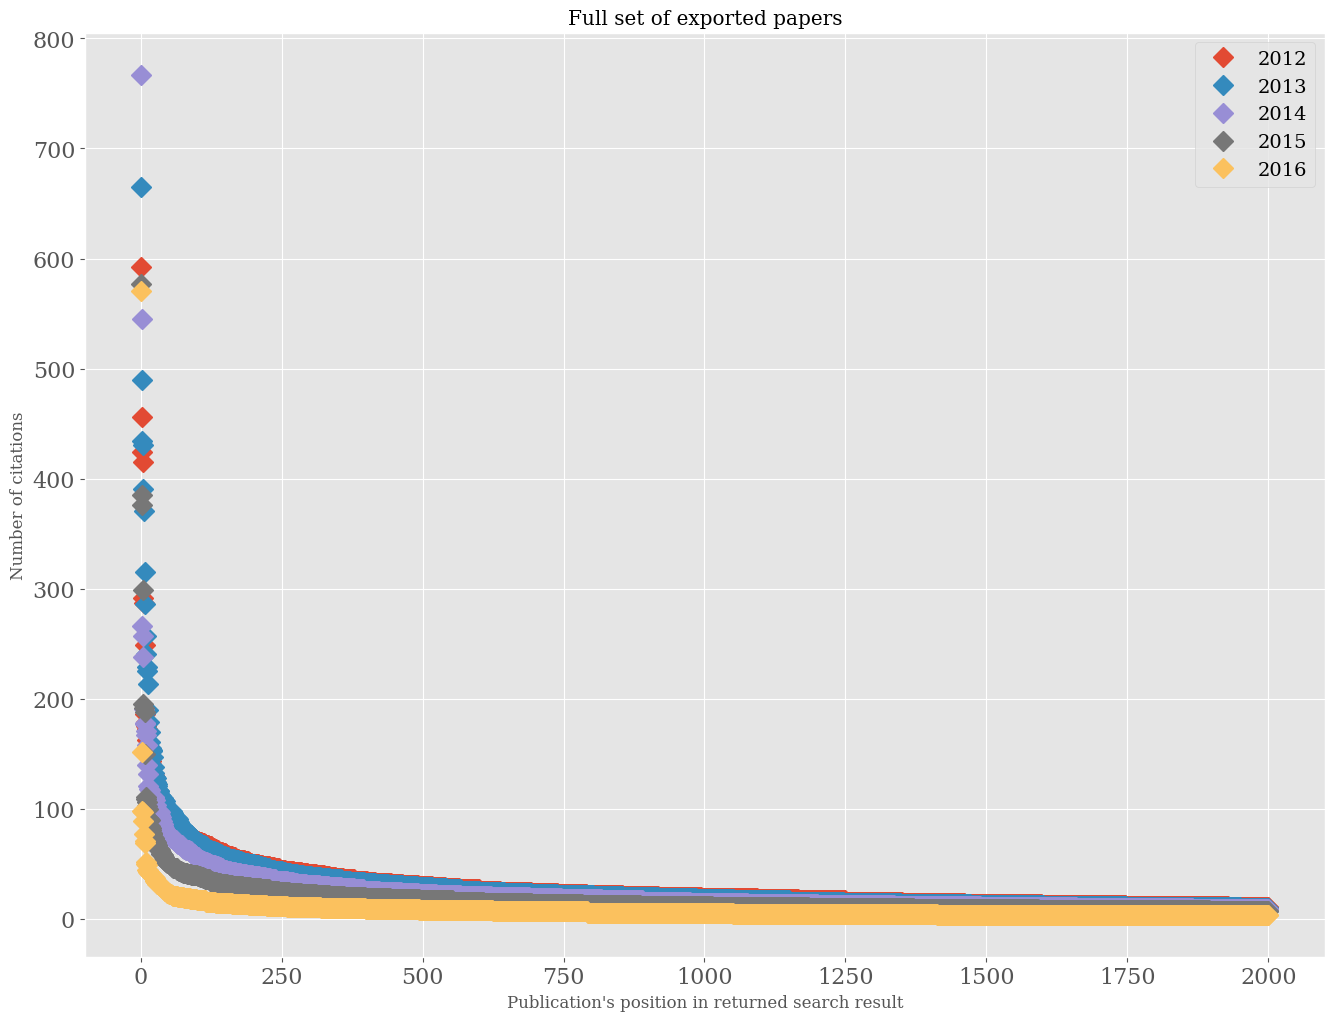

(short):
Paper citation count by year, most cited at top: 
    2012  2013  2014  2015  2016
1    592   665   767   577   571
2    456   490   545   385   152
3    424   434   266   376    98
4    415   431   257   299    97
5    292   391   238   195    89
6    287   371   191   192    77
7    249   315   178   188    71
8    186   286   177   150    69
9    179   257   171   111    52
10   175   241   167   109    50
11   173   229   158   106    49
12   163   225   140   103    45
13   156   214   132   100    45
14   153   190   121    92    43
15   148   179   118    91    42
16   147   170   117    90    42
17   146   161   114    85    41
18   144   155   113    83    41
19   141   154   113    81    40
20   139   154   112    78    39
21   134   153   111    77    39
22   131   147   111    75    38
23   131   138   111    74    38
24   130   133   110    73    37
25   128   129   108    71    37
26   127   129   104    71    35
27   121   128   104    70    34
28   118   125   

<Figure size 640x480 with 0 Axes>

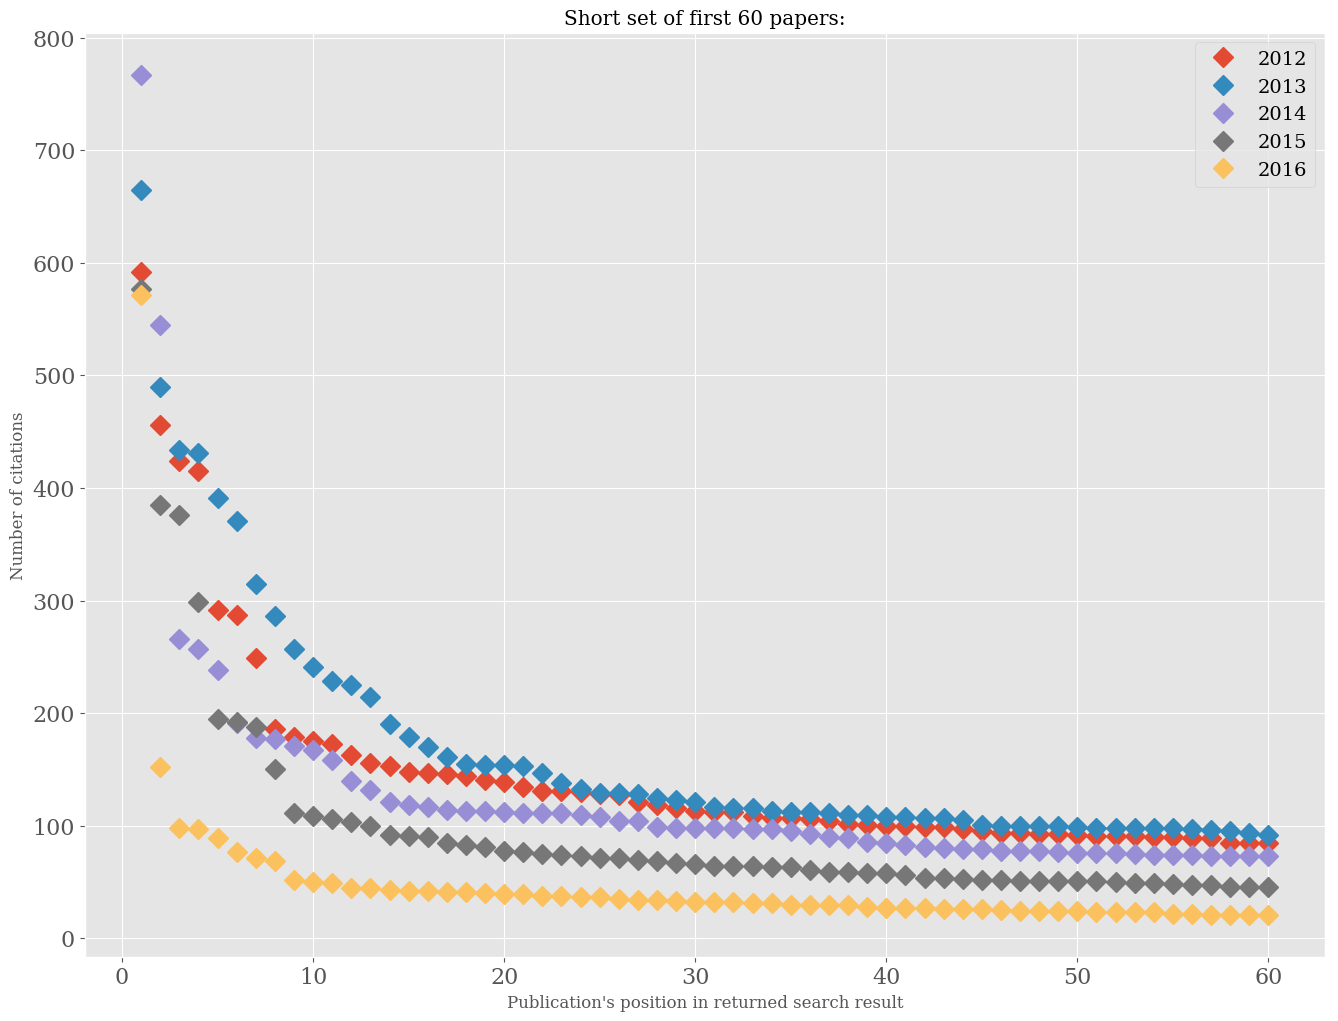

<Figure size 640x480 with 0 Axes>

In [9]:
def __citation_counts(df_dict, plot_title="", show_raw_counts=False, filename_tag="none"):
    """number of publications by year"""

    # get the column headers in sorted order (i.e first year first)
    years = sorted(df_dict)

    # papers x years matrix where each column is a year, 
    # and the rows are the citation counts for each paper from that year,
    # based on the position of that paper in the csv (most cited first)
    values = np.column_stack( [df_dict[year]['Cited by'] for year in years] )
    # store the values in a dataframe with the years as column headers
    citation_counts_by_year = pd.DataFrame(values, columns=years)
    citation_counts_by_year.index += 1
    
    print("Paper citation count by year, most cited at top: ")
    print(citation_counts_by_year)
    
    # export the tail of the citation counts to latex and save it as a textfile
    filename = 'citation_count_table_tail_{}.tex'.format(filename_tag)
    path = os.path.join(figure_output_dir, filename)
    tex = citation_counts_by_year.tail(5).to_latex()
    with open(path, 'w') as f:
        f.write(tex)
    
    
    # Plot all, with different coloured circles for each year's datapoints
    plt0 = citation_counts_by_year.plot(legend=True,
                                        figsize=(16,12),
                                        fontsize=16,
                                        markersize=10,
                                        style=['D' for _ in years]) #, 'ro', 'mo', 'yo', 'co'])
    plt0.legend(fontsize=14, markerscale=1.0)
    plt.title(plot_title)

    #plt.xlim(xmin, xmax)
    plt.xlabel('Publication\'s position in returned search result')
    plt.ylabel('Number of citations')
    
    filename = "citation_by_pos_graph_{}.svg".format(filename_tag)
    path = os.path.join(figure_output_dir, filename)
    plt.savefig(path) #, bbox_inches="tight")
    plt.show()
    plt.clf()
    
    
    
print("(full):")
__citation_counts(dataframes_longlist,
                  plot_title="Full set of exported papers",
                  show_raw_counts=True,
                  filename_tag="full")


print("(short):")
__citation_counts(dataframes_shortlist,
                  plot_title="Short set of first {} papers:".format(num_papers_shortlist),
                  show_raw_counts=True,
                  filename_tag="short")


## Keyword tables

Below, tables for the keywords ("Author Keywords", "Index Keywords") and their occurence proportions are generated.

There are six parts to this, each part repeated three times (for the full set, the top 60, and the top 15 cited papers):

Tables with one separate column for each year, the rows being keywords with the corresponding proportion of times a paper from a year had that keyword out of all the papers from that year), repeated once for each of:
* A table where the Author Keywords and the Index Keywords have been merged together into a single Keyword Column
* A tables for Index Keywords
* A table for Author Keywords

These parts are not too useful, so they have been commented out (total occurences is a field in the three cases above, either way):

Tables where all years have been aggregated into one column, the rows being keywords with the corresponding proportion of times a paper from any year had that keyword out of all the papers, repeated once for each of:
* A table where the Author Keywords and the Index Keywords have been merged together into a single Keyword Column
* A tables for Index Keywords
* A table for Author Keywords


In [10]:
# How many rows to show from the head of the table
MAX_TABLE_LENGTH = 80

def generate_keywords_table(list_of_dfs, keywords_column_namelist):
    '''given a list keywords_column_namelist (e.g 
        ['Author Keywords'],but it may also combine author+index through 
        ['Author Keywords', 'Index Keywords']),
       generate a dataframe that maps each keyword to a proportion of publications in which it appears
       Each publication might have multiple keywords in the csv, separated by a semicolon.
    '''
    def split_field(keyword_field_entry):
        """Split the keyword textfield into individual keywords (separated on ;)
           The separator is an aspect of the exported csv from Scopus.
        """
        #some articles seem to include the same keyword multiple times, so use a set instead
        sub_C = set()

        # no keyword entry
        if type(keyword_field_entry) == float or not keyword_field_entry:
            return sub_C, False
        
        # empty string?
        words = [word.strip().lower() for word in keyword_field_entry.split(';') if word.strip()]
        if not words:
            return sub_C, False
        
        for word in words:
            sub_C.add(word)

        return sub_C,True
    
    C = Counter()
    untagged = 0
    entries = 0
    for df in list_of_dfs:
        # access all given columns (e.g only ["Index Keywords"], or possibly both of
        # ["Index Keywords", "Author Keywords"]
        for IDX,(*keyword_row,) in df[keywords_column_namelist].iterrows():
            # join the provided rows with ;
            keyword_field_entry = ";".join(x.strip() for x in keyword_row if type(x) == str)
            # perhaps some row has a trailing ";"  in which case the above might have added an extra
            keyword_field_entry = keyword_field_entry.replace(";;", ";").strip()
            entries += 1
            sub_counts,no_error = split_field(keyword_field_entry)
            
            # this segment of code is here because in the table of keyword proportions,
            # the actual search term "artifical intelligence" did not appear 100% of the time
            # (but rather around 99%). It turns out that this is because the Scopus search
            # (at the time) returns results that have a keyword which contain the search string
            # as a substring. 
            # E.g: 'artificial intelligence techniques' is a keyword, but not 'artificial intelligence'.
            #
            # Additionally, this may print a lot of output, and it only (realistically) applies to the
            # case where both (or more?) keyword columns have been passed, as it might well be the case
            # that the 'Author Keywords' column does contain the term, but the 'Index Keywords' column
            # does not, and if only 'Index Keywords' was passed in, it might give the impression that
            # the search result did not contain the keyword.
            # For the above reason, this code is commented out by default
            ''' # <-- see comment above
            if not ("artificial intelligence" in sub_counts):
                for key in sub_counts:
                    if "artificial intelligence" in key:
                        paper_title = df.loc[IDX, "Title"]
                        print("IDX #{}: Search string only found as substring in keyword '{}' (title: {})".format(
                            IDX, key, paper_title)), 
                        break
                else:
                    print("IDX #{}: Search term not found as any substring of keyword fields {}".format(IDX, sub_counts))
            '''
            
            if not no_error:
                untagged += 1
                continue
            for key in sub_counts:
                 C[key] += 1

    # just make sure each dataframe row was counted once
    assert entries == sum(len(df) for df in list_of_dfs)
    
    # Make two proportions, one divided by total entries and one divided by only the number of tagged entries.
    keyword_columns=['Keyword', 'Occurences', 'proportion', 'tagged_proportion']
    keyword_data = [(key, C[key], C[key]/float(entries), C[key]/float(entries - untagged)) 
                       for key in sorted(C, key=C.get, reverse=True)]
    keyword_df = pd.DataFrame(keyword_data, columns=keyword_columns)
    return keyword_df, untagged

In [11]:
USE_ABSOLUTE_VALUES = True

def __aggregate_keywords_separate_years(d, keyword_column_namelist):
    """Create a table with the proportion of occurences of a keyword per year
    
       Do this by instead of calling the above generate_keywords_table function with
       all the years (dataframes) at once, do it in turn once for each year, then put
       the resulting table columns for each year side by side.
    """
    merged_df = pd.DataFrame(columns=['Keyword'])
    for year in d:
        # note that here a single dataframe (a list of one element, the df for that year) is passed in
        df,untagged = generate_keywords_table([d[year]], keyword_column_namelist)
        if USE_ABSOLUTE_VALUES:
            df.rename(columns={'Occurences': '{}'.format(year)},
                      inplace=True)
        else:
            df.rename(columns={'proportion': '{}'.format(year),
                               'tagged_proportion': '{}_T'.format(year)}, 
                      inplace=True)
            
        merged_df = merged_df.merge(df, how='outer', on='Keyword')
        
        print('{}:'.format(year))
        print('\tUntagged entries: {}'.format(untagged))
        print('\tTagged entries: {}'.format(len(d[year]) - untagged))
        print('\tTotal entries: {}'.format(len(d[year])))

    merged_df.fillna(0, inplace=True)

    merged_df['mean'] = merged_df[['{}'.format(year) for year in d]].mean(axis=1)
    merged_df['total'] = merged_df[['{}'.format(year) for year in d]].sum(axis=1)

    # Set a mean for each tagged-proportion count as well
    if not USE_ABSOLUTE_VALUES:
        merged_df['mean_T'] = merged_df[['{}_T'.format(year) for year in d]].mean(axis=1)
    
    if USE_ABSOLUTE_VALUES:
        merged_df = merged_df[['Keyword']
                            + [str(year) for year in d] + ['mean'] 
                            + ['total']
                             ]
        merged_df.sort_values(inplace=True, ascending=False, by=['mean', 'Keyword'])
    else:
        merged_df = merged_df[['Keyword']
                            + [str(year) for year in d] + ['mean'] 
                            + ['{}_T'.format(year) for year in d] + ['mean_T']
                            + ['total']
                             ]
        merged_df.sort_values(inplace=True, ascending=False, by=['mean', 'mean_T', 'Keyword'])
                        

    # The "'_T' not in x"-part excludes additional columns that for each year include 
    # a proportion counted with respect to number of tagged rows (e.g column 2012_T),
    # as opposed to with respect to total number of rows.
    # Other than that, this includes in the table the columns:
    #  [keywords, *[each_years_proportion], mean, mean_T]
    # Because I consider including two different ways to calculate the mean, by default the
    # tagged-proportion mean is not used, but if desirable it can be included by swapping out
    # the two lines below (and additionally setting USE_ABSOLUTE_VALUES to False):
    #
    #selected_columns = [x for x in merged_df.columns if ('mean' in x or '_T' not in x)]

    # exclude any _T-proportion column, even mean_T (as opposed to including mean_T like above).
    selected_columns = [x for x in merged_df.columns if ('_T' not in x)]

    result = merged_df[selected_columns]

    # reset index to start counting at 0 for the most common keyword
    #merged_df = merged_df.reset_index()
    result = result.reset_index(drop=True)
    result.index += 1
    
    return result

def __aggregate_keywords_merge_years(list_of_dfs, keyword_column_namelist):
    """Create a table with the proportion of occurences of a keyword across all years"""
    # note that here a list of dataframes is passed in, rather than a list of a single dataframe
    df,untagged = generate_keywords_table(list_of_dfs, keyword_column_namelist)
    
    total_number_of_entries = sum(len(x) for x in list_of_dfs)
    print('\tUntagged entries: {}'.format(untagged))
    print('\tTagged entries: {}'.format(total_number_of_entries - untagged))
    print('\tTotal entries: {}'.format(total_number_of_entries))

    #df.fillna(0, inplace=True)
    selected_columns = [x for x in df.columns if ('tagged' not in x)]
    result = df[selected_columns]    

    # reset index to start counting at 0 for the most common keyword
    #merged_df = merged_df.reset_index()
    result = result.reset_index(drop=True)
    result.index += 1
    
    return result

In [12]:
def save_and_display_table(table, merged_or_sep, keyword_column_namelist, filename_tag):
    tex = table.to_latex() #index=False)
    column_names = "_".join([x.split()[0] for x in keyword_column_namelist])
    filename = "keyword_table_{merged_or_sep}_{colnames}_{tag}.tex".format(
        merged_or_sep=merged_or_sep,
        colnames=column_names,
        tag=filename_tag)
    
    path = os.path.join(figure_output_dir, filename)
    with open(path, 'w') as f:
        f.write(tex)
    
    print("{}: ".format(path))
    display(table)

In [13]:
#proportion of keyword occurences to number of papers each year is listed separately by year
def __index_keywords_sep(df_dict, filename_tag):
    column_names = ['Index Keywords']
    sep_df_1 = __aggregate_keywords_separate_years(df_dict, column_names)

    save_and_display_table(table=sep_df_1.head(MAX_TABLE_LENGTH),
                       merged_or_sep='sep',
                       keyword_column_namelist=column_names,
                       filename_tag=filename_tag)

    #return sep_df_1

def __author_keywords_sep(df_dict, filename_tag):
    column_names = ['Author Keywords']
    sep_df_1 = __aggregate_keywords_separate_years(df_dict, column_names)

    save_and_display_table(table=sep_df_1.head(MAX_TABLE_LENGTH),
                           merged_or_sep='sep',
                           keyword_column_namelist=column_names,
                           filename_tag=filename_tag)

    #return sep_df_1

def __both_keywords_sep(df_dict, filename_tag):
    column_names = ['Author Keywords', 'Index Keywords']
    sep_df_1 = __aggregate_keywords_separate_years(df_dict, column_names)
    
    save_and_display_table(table=sep_df_1.head(MAX_TABLE_LENGTH),
                           merged_or_sep='sep',
                           keyword_column_namelist=column_names,
                           filename_tag=filename_tag)

    #return sep_df_1

In [14]:
def __index_keywords(df_dict, filename_tag):
    column_names = ['Index Keywords']
    merged_df_1 = __aggregate_keywords_merge_years([df_dict[year] for year in df_dict], column_names)
    
    save_and_display_table(table=merged_df_1.head(MAX_TABLE_LENGTH),
                           merged_or_sep='merged',
                           keyword_column_namelist=column_names,
                           filename_tag=filename_tag)
    
    #return merged_df_1

def __author_keywords(df_dict, filename_tag):
    column_names = ['Author Keywords']
    merged_df_1 = __aggregate_keywords_merge_years([df_dict[year] for year in df_dict], column_names)

    save_and_display_table(table=merged_df_1.head(MAX_TABLE_LENGTH),
                           merged_or_sep='merged',
                           keyword_column_namelist=column_names,
                           filename_tag=filename_tag)

    #return merged_df_1 

def __both_keywords(df_dict, filename_tag):
    column_names = ['Author Keywords', 'Index Keywords']
    merged_df_1 = __aggregate_keywords_merge_years([df_dict[year] for year in df_dict], column_names)

    save_and_display_table(table=merged_df_1.head(MAX_TABLE_LENGTH),
                           merged_or_sep='merged',
                           keyword_column_namelist=column_names,
                           filename_tag=filename_tag)

    #return merged_df_1 

### All keywords, separated by year:

In [15]:
print("=== All keywords, full-length dataframes summary ===")
__both_keywords_sep(dataframes_longlist, 'full')
print("=== All keywords, short-length dataframes summary ===")
__both_keywords_sep(dataframes_shortlist, 'short')
print("=== All keywords, veryshort-length dataframes summary ===")
__both_keywords_sep(dataframes_veryshortlist, 'veryshort')

=== All keywords, full-length dataframes summary ===
2012:
	Untagged entries: 0
	Tagged entries: 2000
	Total entries: 2000
2013:
	Untagged entries: 0
	Tagged entries: 2000
	Total entries: 2000
2014:
	Untagged entries: 0
	Tagged entries: 2000
	Total entries: 2000
2015:
	Untagged entries: 0
	Tagged entries: 2000
	Total entries: 2000
2016:
	Untagged entries: 0
	Tagged entries: 2000
	Total entries: 2000
figs/keyword_table_sep_Author_Index_full.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,1984.0,1982.0,1988.0,1999.0,1998.0,1990.2,9951.0
2,learning systems,99.0,138.0,518.0,967.0,1017.0,547.8,2739.0
3,algorithms,625.0,601.0,533.0,503.0,348.0,522.0,2610.0
4,article,578.0,582.0,381.0,211.0,172.0,384.8,1924.0
5,humans,362.0,372.0,357.0,199.0,119.0,281.8,1409.0
6,algorithm,343.0,344.0,344.0,200.0,141.0,274.4,1372.0
7,human,317.0,336.0,346.0,216.0,155.0,274.0,1370.0
8,machine learning,116.0,150.0,283.0,369.0,396.0,262.8,1314.0
9,optimization,147.0,146.0,148.0,231.0,309.0,196.2,981.0
10,learning algorithms,76.0,78.0,145.0,276.0,273.0,169.6,848.0


=== All keywords, short-length dataframes summary ===
2012:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2013:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2014:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2015:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2016:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
figs/keyword_table_sep_Author_Index_short.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,60.0,58.0,60.0,60.0,60.0,59.6,298.0
2,algorithms,29.0,25.0,12.0,16.0,16.0,19.6,98.0
3,article,28.0,21.0,16.0,12.0,10.0,17.4,87.0
4,learning systems,4.0,7.0,12.0,28.0,34.0,17.0,85.0
5,algorithm,22.0,17.0,11.0,12.0,13.0,15.0,75.0
6,human,19.0,13.0,14.0,14.0,14.0,14.8,74.0
7,humans,20.0,13.0,14.0,13.0,13.0,14.6,73.0
8,"pattern recognition, automated",23.0,16.0,8.0,2.0,2.0,10.2,51.0
9,automated pattern recognition,19.0,15.0,8.0,2.0,3.0,9.4,47.0
10,procedures,3.0,6.0,9.0,16.0,10.0,8.8,44.0


=== All keywords, veryshort-length dataframes summary ===
2012:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2013:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2014:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2015:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2016:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
figs/keyword_table_sep_Author_Index_veryshort.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,15.0,14.0,15.0,15.0,15.0,14.8,74.0
2,algorithms,11.0,8.0,3.0,4.0,5.0,6.2,31.0
3,article,11.0,5.0,4.0,5.0,4.0,5.8,29.0
4,learning systems,2.0,0.0,3.0,7.0,10.0,4.4,22.0
5,human,6.0,2.0,4.0,5.0,5.0,4.4,22.0
6,humans,6.0,2.0,4.0,5.0,4.0,4.2,21.0
7,algorithm,8.0,3.0,3.0,3.0,4.0,4.2,21.0
8,"pattern recognition, automated",9.0,4.0,4.0,1.0,0.0,3.6,18.0
9,automated pattern recognition,6.0,4.0,4.0,1.0,1.0,3.2,16.0
10,priority journal,4.0,1.0,1.0,4.0,3.0,2.6,13.0


### Index keywords, sep:

In [16]:
print("=== Index keywords, full-length dataframes summary ===")
__index_keywords_sep(dataframes_longlist, 'full')
print("=== Index keywords, short-length dataframes summary ===")
__index_keywords_sep(dataframes_shortlist, 'short')
print("=== Index keywords, veryshort-length dataframes summary ===")
__index_keywords_sep(dataframes_veryshortlist, 'veryshort')

=== Index keywords, full-length dataframes summary ===
2012:
	Untagged entries: 7
	Tagged entries: 1993
	Total entries: 2000
2013:
	Untagged entries: 8
	Tagged entries: 1992
	Total entries: 2000
2014:
	Untagged entries: 15
	Tagged entries: 1985
	Total entries: 2000
2015:
	Untagged entries: 6
	Tagged entries: 1994
	Total entries: 2000
2016:
	Untagged entries: 3
	Tagged entries: 1997
	Total entries: 2000
figs/keyword_table_sep_Index_full.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,1973.0,1975.0,1974.0,1990.0,1989.0,1980.2,9901.0
2,learning systems,99.0,138.0,518.0,967.0,1017.0,547.8,2739.0
3,algorithms,625.0,601.0,532.0,503.0,346.0,521.4,2607.0
4,article,578.0,582.0,381.0,211.0,172.0,384.8,1924.0
5,humans,362.0,372.0,357.0,199.0,119.0,281.8,1409.0
6,human,317.0,336.0,346.0,216.0,155.0,274.0,1370.0
7,algorithm,342.0,343.0,343.0,200.0,141.0,273.8,1369.0
8,optimization,146.0,145.0,148.0,231.0,309.0,195.8,979.0
9,learning algorithms,76.0,78.0,145.0,276.0,273.0,169.6,848.0
10,priority journal,174.0,173.0,154.0,116.0,130.0,149.4,747.0


=== Index keywords, short-length dataframes summary ===
2012:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2013:
	Untagged entries: 1
	Tagged entries: 59
	Total entries: 60
2014:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2015:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
2016:
	Untagged entries: 0
	Tagged entries: 60
	Total entries: 60
figs/keyword_table_sep_Index_short.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,59.0,58.0,60.0,60.0,60.0,59.4,297.0
2,algorithms,29.0,25.0,12.0,16.0,16.0,19.6,98.0
3,article,28.0,21.0,16.0,12.0,10.0,17.4,87.0
4,learning systems,4.0,7.0,12.0,28.0,34.0,17.0,85.0
5,algorithm,22.0,17.0,11.0,12.0,13.0,15.0,75.0
6,human,19.0,13.0,14.0,14.0,14.0,14.8,74.0
7,humans,20.0,13.0,14.0,13.0,13.0,14.6,73.0
8,"pattern recognition, automated",23.0,16.0,8.0,2.0,2.0,10.2,51.0
9,automated pattern recognition,19.0,15.0,8.0,2.0,3.0,9.4,47.0
10,procedures,3.0,6.0,9.0,16.0,10.0,8.8,44.0


=== Index keywords, veryshort-length dataframes summary ===
2012:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2013:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2014:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2015:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
2016:
	Untagged entries: 0
	Tagged entries: 15
	Total entries: 15
figs/keyword_table_sep_Index_veryshort.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,artificial intelligence,15.0,14.0,15.0,15.0,15.0,14.8,74.0
2,algorithms,11.0,8.0,3.0,4.0,5.0,6.2,31.0
3,article,11.0,5.0,4.0,5.0,4.0,5.8,29.0
4,learning systems,2.0,0.0,3.0,7.0,10.0,4.4,22.0
5,human,6.0,2.0,4.0,5.0,5.0,4.4,22.0
6,humans,6.0,2.0,4.0,5.0,4.0,4.2,21.0
7,algorithm,8.0,3.0,3.0,3.0,4.0,4.2,21.0
8,"pattern recognition, automated",9.0,4.0,4.0,1.0,0.0,3.6,18.0
9,automated pattern recognition,6.0,4.0,4.0,1.0,1.0,3.2,16.0
10,priority journal,4.0,1.0,1.0,4.0,3.0,2.6,13.0


### Author keywords, sep:

In [17]:
print("=== Author keywords, full-length dataframes summary ===")
__author_keywords_sep(dataframes_longlist, 'full')
print("=== Author keywords, short-length dataframes summary ===")
__author_keywords_sep(dataframes_shortlist, 'short')
print("=== Author keywords, veryshort-length dataframes summary ===")
__author_keywords_sep(dataframes_veryshortlist, 'veryshort')


=== Author keywords, full-length dataframes summary ===
2012:
	Untagged entries: 734
	Tagged entries: 1266
	Total entries: 2000
2013:
	Untagged entries: 744
	Tagged entries: 1256
	Total entries: 2000
2014:
	Untagged entries: 632
	Tagged entries: 1368
	Total entries: 2000
2015:
	Untagged entries: 607
	Tagged entries: 1393
	Total entries: 2000
2016:
	Untagged entries: 562
	Tagged entries: 1438
	Total entries: 2000
figs/keyword_table_sep_Author_full.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,machine learning,51.0,69.0,193.0,272.0,307.0,178.4,892.0
2,artificial intelligence,65.0,47.0,78.0,44.0,55.0,57.8,289.0
3,ant colony optimization,57.0,67.0,38.0,40.0,34.0,47.2,236.0
4,classification,34.0,35.0,52.0,57.0,54.0,46.4,232.0
5,swarm intelligence,53.0,41.0,46.0,43.0,41.0,44.8,224.0
6,feature selection,20.0,21.0,41.0,52.0,45.0,35.8,179.0
7,particle swarm optimization,38.0,40.0,28.0,22.0,26.0,30.8,154.0
8,support vector machine,13.0,14.0,41.0,40.0,32.0,28.0,140.0
9,decision support system,35.0,29.0,27.0,17.0,20.0,25.6,128.0
10,neural networks,17.0,19.0,22.0,29.0,37.0,24.8,124.0


=== Author keywords, short-length dataframes summary ===
2012:
	Untagged entries: 13
	Tagged entries: 47
	Total entries: 60
2013:
	Untagged entries: 13
	Tagged entries: 47
	Total entries: 60
2014:
	Untagged entries: 22
	Tagged entries: 38
	Total entries: 60
2015:
	Untagged entries: 23
	Tagged entries: 37
	Total entries: 60
2016:
	Untagged entries: 18
	Tagged entries: 42
	Total entries: 60
figs/keyword_table_sep_Author_short.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,machine learning,1.0,3.0,1.0,7.0,12.0,4.8,24.0
2,particle swarm optimization,1.0,11.0,1.0,2.0,1.0,3.2,16.0
3,deep learning,0.0,0.0,2.0,3.0,7.0,2.4,12.0
4,swarm intelligence,2.0,0.0,2.0,2.0,1.0,1.4,7.0
5,support vector machines,0.0,2.0,1.0,0.0,3.0,1.2,6.0
6,neural networks,1.0,3.0,1.0,0.0,1.0,1.2,6.0
7,neural network,0.0,0.0,1.0,1.0,4.0,1.2,6.0
8,feature selection,1.0,1.0,3.0,0.0,1.0,1.2,6.0
9,artificial neural networks,0.0,3.0,0.0,0.0,3.0,1.2,6.0
10,testing,0.0,5.0,0.0,0.0,0.0,1.0,5.0


=== Author keywords, veryshort-length dataframes summary ===
2012:
	Untagged entries: 2
	Tagged entries: 13
	Total entries: 15
2013:
	Untagged entries: 1
	Tagged entries: 14
	Total entries: 15
2014:
	Untagged entries: 7
	Tagged entries: 8
	Total entries: 15
2015:
	Untagged entries: 7
	Tagged entries: 8
	Total entries: 15
2016:
	Untagged entries: 3
	Tagged entries: 12
	Total entries: 15
figs/keyword_table_sep_Author_veryshort.tex: 


,Keyword,2012,2013,2014,2015,2016,mean,total
1,machine learning,1.0,1.0,0.0,3.0,4.0,1.8,9.0
2,particle swarm optimization,1.0,6.0,0.0,0.0,0.0,1.4,7.0
3,testing,0.0,4.0,0.0,0.0,0.0,0.8,4.0
4,evolutionary computation,0.0,4.0,0.0,0.0,0.0,0.8,4.0
5,deep learning,0.0,0.0,1.0,1.0,2.0,0.8,4.0
6,stochastic processes,0.0,3.0,0.0,0.0,0.0,0.6,3.0
7,big data,0.0,2.0,0.0,0.0,1.0,0.6,3.0
8,swarm intelligence,2.0,0.0,0.0,0.0,0.0,0.4,2.0
9,sparse representation,1.0,1.0,0.0,0.0,0.0,0.4,2.0
10,social networks,0.0,1.0,0.0,0.0,1.0,0.4,2.0


# Years combined

The following tables do not really present anything not already presented above, they just show a table with all years combined into one field and the proportion of times a keyword (in any year) occured in a paper.

### All keywords:

In [18]:
#print("=== All keywords, full-length dataframes summary ===")
#__both_keywords(dataframes_longlist, 'full')
#print("=== All keywords, short-length dataframes summary ===")
#__both_keywords(dataframes_shortlist, 'short')
#print("=== All keywords, veryshort-length dataframes summary ===")
#__both_keywords(dataframes_veryshortlist, 'veryshort')

### Index keywords:

In [19]:
#print("=== Index keywords, full-length dataframes summary ===")
#__index_keywords(dataframes_longlist, 'full')
#print("=== Index keywords, short-length dataframes summary ===")
#__index_keywords(dataframes_shortlist, 'short')
#print("=== Index keywords, veryshort-length dataframes summary ===")
#__index_keywords(dataframes_veryshortlist, 'veryshort')

### Author keywords:

In [20]:
#print("=== Author keywords, full-length dataframes summary ===")
#__author_keywords(dataframes_longlist, 'full')
#print("=== Author keywords, short-length dataframes summary ===")
#__author_keywords(dataframes_shortlist, 'short')
#print("=== Author keywords, veryshort-length dataframes summary ===")
#__author_keywords(dataframes_veryshortlist, 'veryshort')